# Simple Linear Classification Example

This example uses the breast cancer dataset from Sklearn to train a simple binary classifier to predict whether the given samples contains cancer. For a given sample, defined by a feature vector $x$, the network outputs a prediction $\hat{y} = p(y=1|x) = \rho(w^tx + b)$ which is the probability that $y=1$ given $x$. Here $y=1$ means that the hypothesis that the sample contains cancer is true. Mathematically this can be expressed as follows

$$
\begin{align*}
z &= w^tx + b \\
\hat{y} &= \rho(z) \\
\rho(z) &= \frac{1}{1 + e^{-z}}
\end{align*}
$$

, where $x$ is the feature vector, $w$ are the network weights and $b$ is a bias term. This is a logistic regression model, where the activation function $\rho$ is a Sigmoid function.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Reduce TF verbosity
import tensorflow as tf
tf.get_logger().setLevel('INFO') # Reduce TF verbosity
print(f"tensorflow version: {tf.__version__}")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

tensorflow version: 2.8.0


## Load the breast cancer dataset, and display feature names

In [2]:
#Load the breast cancer data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Check type of data and print the keys
print(f"Type of data: {type(data)}")
print(f"Keys: {data.keys()}")
print(f"Shape of the data: {data.data.shape}")
print(f"Shape of the target: {data.target.shape}")
print(f"Feature names: {data.feature_names}")
print(f"Target names: {data.target_names}")

Type of data: <class 'sklearn.utils.Bunch'>
Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of the data: (569, 30)
Shape of the target: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


## Split the dataset into training- and testing sets, and scale the data

In [3]:
# Split input features and target into train- and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Create the model, and display the summary

In [4]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Compile and train the model

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 0.7743 - accuracy: 0.6430 - val_loss: 0.7423 - val_accuracy: 0.6596
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7137 - accuracy: 0.6929 - val_loss: 0.6928 - val_accuracy: 0.6809
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6595 - accuracy: 0.7192 - val_loss: 0.6488 - val_accuracy: 0.7128
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6119 - accuracy: 0.7507 - val_loss: 0.6099 - val_accuracy: 0.7340
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5706 - accuracy: 0.7769 - val_loss: 0.5745 - val_accuracy: 0.7553
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7927 - val_loss: 0.5424 - val_accuracy: 0.7660
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5022 - accuracy: 0.8084 - val_loss: 0.5137 - val_accuracy: 0.7713
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1258 - accuracy: 0.9580 - val_loss: 0.1546 - val_accuracy: 0.9362
Epoch 60/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1242 - accuracy: 0.9606 - val_loss: 0.1530 - val_accuracy: 0.9362
Epoch 61/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1229 - accuracy: 0.9606 - val_loss: 0.1515 - val_accuracy: 0.9415
Epoch 62/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1215 - accuracy: 0.9606 - val_loss: 0.1501 - val_accuracy: 0.9415
Epoch 63/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.9606 - val_loss: 0.1486 - val_accuracy: 0.9521
Epoch 64/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1190 - accuracy: 0.9606 - val_loss: 0.1472 - val_accuracy: 0.9521
Epoch 65/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1178 - accuracy: 0.9633 - val_loss: 0.1460 - val_accuracy: 0.9521
Epoch 

## Evaluate the model and show the weights

In [6]:
# Evaluate the model
print(f"Train score: {model.evaluate(X_train, y_train)}")
print(f"Test score: {model.evaluate(X_test, y_test)}")

12/12 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9738
Train score: [0.09164251387119293, 0.9737532734870911]
6/6 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9628
Test score: [0.1155359074473381, 0.9627659320831299]


In [7]:
# Model weights
for layer in model.layers:
    print(f"Layer weights: {layer.weights}")
    print(f"Layer bias: {layer.bias}")
    print("---")

Layer weights: [<tf.Variable 'dense/kernel:0' shape=(30, 1) dtype=float32, numpy=
array([[-0.10689857],
       [-0.13924134],
       [-0.47179964],
       [-0.19667318],
       [-0.18919589],
       [ 0.10439908],
       [-0.43245804],
       [-0.39460778],
       [-0.12769288],
       [ 0.32760632],
       [-0.68863046],
       [-0.20778546],
       [-0.73809737],
       [-0.19611391],
       [ 0.16160595],
       [-0.029812  ],
       [-0.02258375],
       [ 0.04521279],
       [ 0.27488336],
       [ 0.17553832],
       [-0.7959657 ],
       [-0.3638325 ],
       [-0.37749276],
       [-0.57186973],
       [-0.60102284],
       [-0.27013475],
       [-0.57092893],
       [ 0.03371633],
       [-0.29435122],
       [ 0.09852967]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.37030408], dtype=float32)>]
Layer bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.37030408], dtype=float32)>
---


## Plot loss and accuracy per epoch

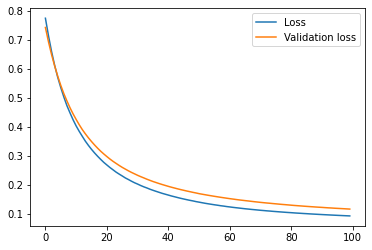

In [8]:
# Plot loss
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

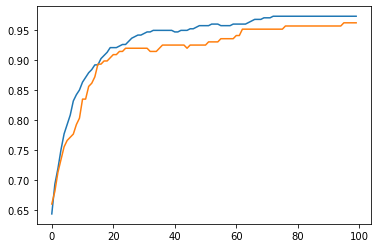

In [9]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')

In [10]:
print(f"Model accuracy with the test data: {model.evaluate(X_test, y_test)}")

6/6 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9628
Model accuracy with the test data: [0.1155359074473381, 0.9627659320831299]


## Predict the result for randomly chosen feature vectors

In [11]:
for i in range(10):
    index = np.random.choice(X_test.shape[0], 1)
    print(f'Predicted value: {model.predict(X_test[index])[0][0]}, true value: {y_test[index[0]]}')

Predicted value: 0.98521488904953, true value: 1
Predicted value: 0.9139053225517273, true value: 1
Predicted value: 0.9978263974189758, true value: 1
Predicted value: 0.7971566915512085, true value: 1
Predicted value: 0.901099681854248, true value: 1
Predicted value: 0.9231225252151489, true value: 1
Predicted value: 0.0012330743484199047, true value: 0
Predicted value: 0.9908413887023926, true value: 1
Predicted value: 0.07162536680698395, true value: 0
Predicted value: 0.993513286113739, true value: 1
